<a href="https://colab.research.google.com/github/Johndim02/Xgboost1/blob/main/XGBoost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
bookings= pd.read_csv('hotel_bookings_clean.csv')
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   children                        119206 non-null  float64
 9   babies                          119210 non-null  int64  
 10  is_repeated_guest               119210 non-null  int64  
 11  previous_cancellations          119210 non-null  int64  
 12  previous_booking

In [3]:
bookings.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119206.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,27.163376,15.798717,6.552051,0.927053,2.499195,1.859206,0.104047,0.007961,...,0.017549,0.005042,0.000050,0.876277,0.122364,0.001359,0.034158,0.004815,0.750575,0.210452
std,0.483012,106.875450,13.601107,8.781070,3.089796,0.995117,1.897106,0.575186,0.398842,0.097509,...,0.131305,0.070825,0.007094,0.329266,0.327707,0.036839,0.181636,0.069223,0.432682,0.407631
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,16.000000,8.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,69.000000,28.000000,16.000000,7.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,161.000000,38.000000,23.000000,9.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,737.000000,53.000000,31.000000,12.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
bookings['is_canceled'].value_counts()/bookings['is_canceled'].count()


,count
is_canceled,
0,0.629234
1,0.370766


In [5]:
X, y = bookings.iloc[:,1:],bookings.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)


from sklearn.model_selection import RandomizedSearchCV
rs_param_grid = {
'max_depth': list((range(3,12))),
'alpha': [0, 0.001, 0.01, 0.1],
'subsample': [0.25, 0.5, 0.75, 1],
'learning_rate' : np.linspace(0.01,0.5,10),
'n_estimators' : [10, 25, 40]
}

xgb_clf= xgb.XGBClassifier(eval_metric='error',random_state=123)

xgb_rs= RandomizedSearchCV(estimator=xgb_clf, param_distributions=rs_param_grid,cv=3,n_iter=5,verbose=2)

xgb_rs.fit(X_train, y_train)
preds=xgb_rs.predict(X_test)
xgb_rs.get_params()
print(xgb_rs.best_params_)
print(xgb_rs.best_score_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END alpha=0, learning_rate=0.2822222222222222, max_depth=10, n_estimators=10, subsample=1; total time=   0.7s
[CV] END alpha=0, learning_rate=0.2822222222222222, max_depth=10, n_estimators=10, subsample=1; total time=   0.5s
[CV] END alpha=0, learning_rate=0.2822222222222222, max_depth=10, n_estimators=10, subsample=1; total time=   0.5s
[CV] END alpha=0.01, learning_rate=0.5, max_depth=10, n_estimators=25, subsample=0.25; total time=   0.7s
[CV] END alpha=0.01, learning_rate=0.5, max_depth=10, n_estimators=25, subsample=0.25; total time=   0.8s
[CV] END alpha=0.01, learning_rate=0.5, max_depth=10, n_estimators=25, subsample=0.25; total time=   2.9s
[CV] END alpha=0.1, learning_rate=0.44555555555555554, max_depth=3, n_estimators=25, subsample=1; total time=   0.5s
[CV] END alpha=0.1, learning_rate=0.44555555555555554, max_depth=3, n_estimators=25, subsample=1; total time=   0.5s
[CV] END alpha=0.1, learning_rate=0.4455555

In [20]:
accurancy=float(np.sum(preds==y_test))/y_test.shape[0]
print('Baseline accurancy:',accurancy)

Baseline accurancy: 0.8252669039145908


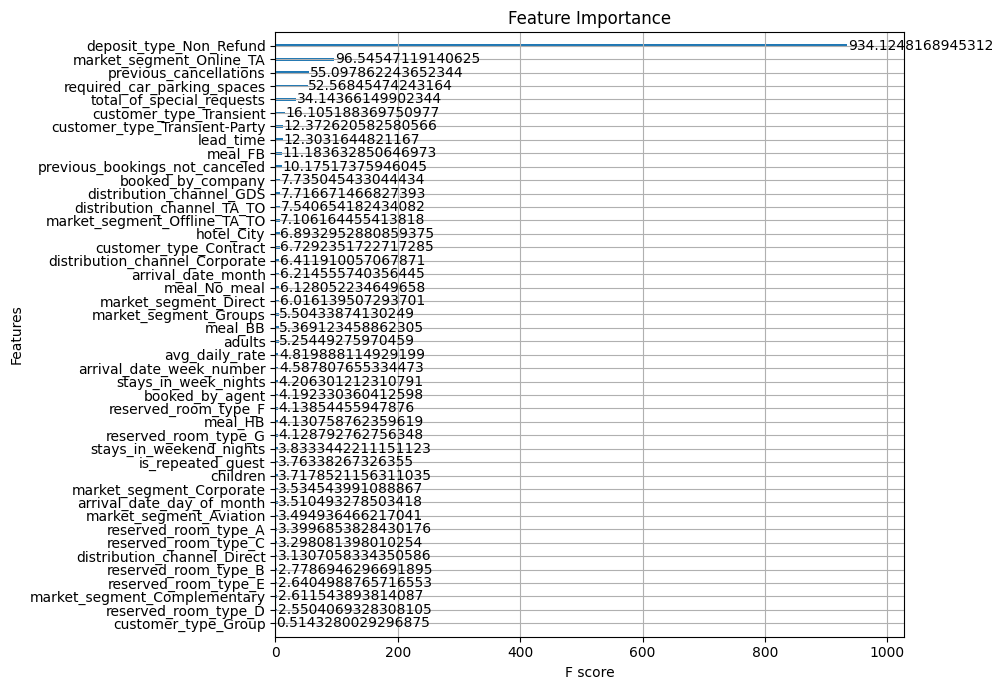

In [23]:
import matplotlib.pyplot as plt
import xgboost as xgb
import matplotlib

matplotlib.rcParams['figure.figsize'] = [10.0, 7]

# Plot feature importance from the best model found
xgb.plot_importance(xgb_rs.best_estimator_, importance_type='gain')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

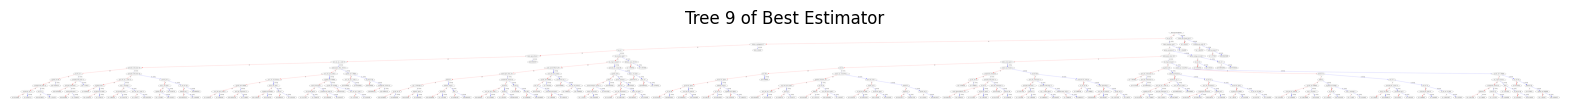

In [27]:
matplotlib.rcParams['figure.figsize'] = [20.0, 8]

# Προβολή του 10ου δέντρου του καλύτερου estimator
xgb.plot_tree(xgb_rs.best_estimator_, num_trees=9)
plt.title("Tree 9 of Best Estimator")
plt.show()
